### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Data

In [3]:
data = pd.read_csv('./1.04.+Real-life+example.csv')

In [5]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [7]:
data.shape

(4345, 9)

In [6]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Data Cleaning

As we can notice that the total observations in some columns are less than other columns maximum being 4345 which also happens to be total observations of our dataset. <br>
This is because of non-available data in our dataset, and in order to perform Linear Regression, we should clean our dataset by removing such observations.

In [13]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Analysing the Probability distribution curve for non vategorial variables
<p> On observing descriptive statistics from close, specifically in non categorial variables namely:
<li> Price
<li> Milage
<li> EngineV
<li> Year
</P>
<p>
We will observe that the descriptive statistics are indicating towards the presence of Outliers. <br>
To confirm that we can take a look at the probability distribution curves for these variables.

Text(0.5, 1.0, 'Year')

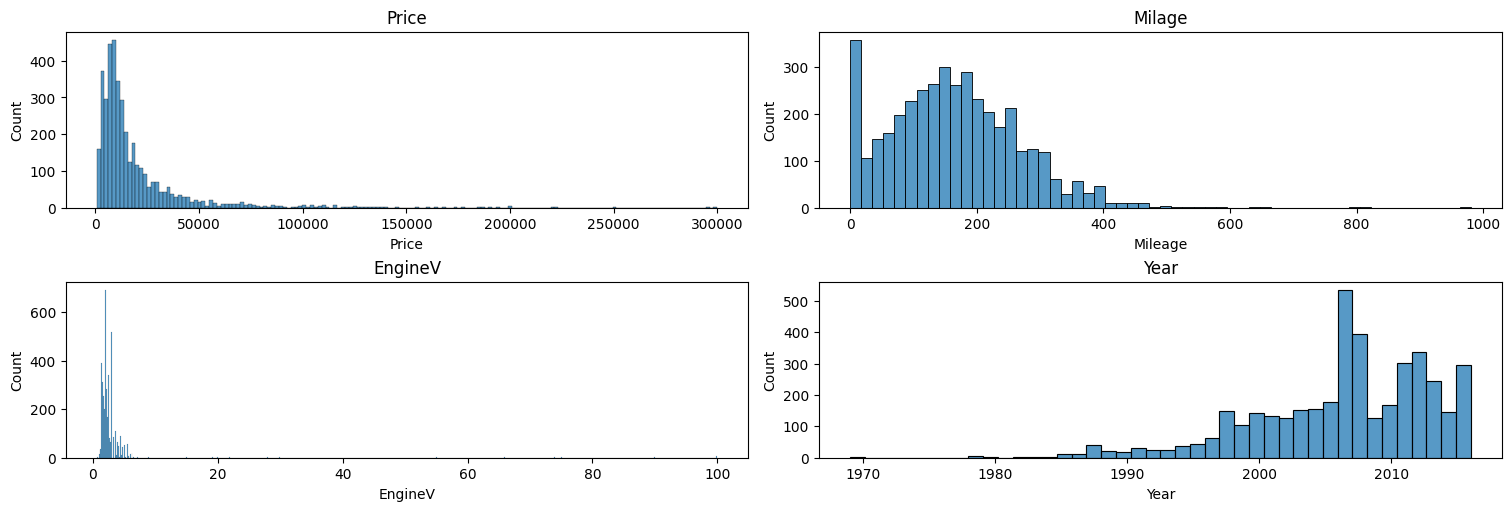

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5), layout="constrained")
sns.histplot(data['Price'], ax=axs[0,0])
sns.histplot(data['Mileage'], ax=axs[0,1])
sns.histplot(data['EngineV'], ax=axs[1,0])
sns.histplot(data['Year'], ax=axs[1,1])
axs[0,0].set_title("Price")
axs[0,1].set_title("Milage")
axs[1,0].set_title("EngineV")
axs[1,1].set_title("Year")


<p> On observing these charts, we can notice that all of these charts have thin tails in the right indicating the presence of outliers. <br>
So our next step will be to remove these outliers.</p>
<p> So to make our data more useful, we will remove the top 1% of values from Price and Milage variables and any value that is greater than 6.5 in Engine Volume column.
<p> We will also remove all observations where the year is in first percentile of data, as it is possible that these cars are vintage and that can reduce the linearity from our dataset.

In [29]:
# Removing Outiers from price
Q_price = data['Price'].quantile(0.99)
Q_milage = data['Mileage'].quantile(0.99)
Q_year = data['Year'].quantile(0.01)

data = data[(data['Price'] < Q_price) & (data['Mileage'] < Q_milage) & (data['Year'] > Q_year) & (data['EngineV'] <= 6.5)]


In [30]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18201.955032,NaN,160.471425,2.451293,NaN,NaN,2006.713473,NaN
std,NaN,19086.956320,NaN,95.531340,0.951521,NaN,NaN,6.100481,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


Text(0.5, 1.0, 'Year')

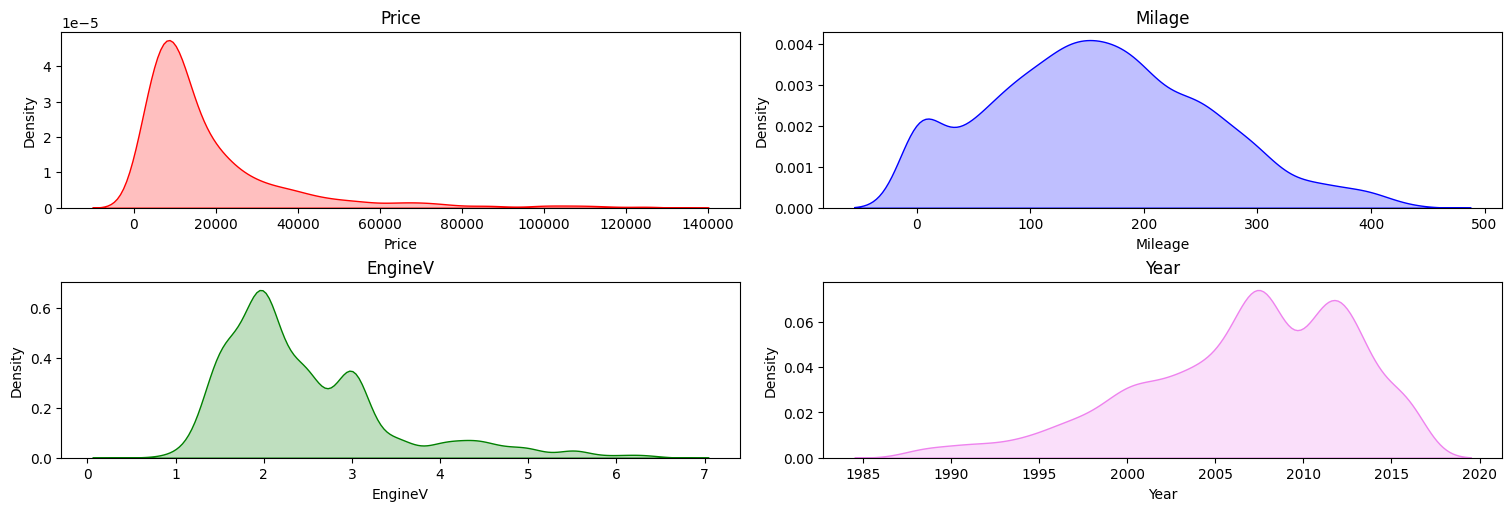

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5), layout="constrained")
sns.kdeplot(data['Price'], fill=True, color="red", ax=axs[0,0])
sns.kdeplot(data['Mileage'], fill=True, color="blue", ax=axs[0,1])
sns.kdeplot(data['EngineV'], fill=True, color="green", ax=axs[1,0])
sns.kdeplot(data['Year'], fill=True, color="violet", ax=axs[1,1])
axs[0,0].set_title("Price")
axs[0,1].set_title("Milage")
axs[1,0].set_title("EngineV")
axs[1,1].set_title("Year")

Although Price column still has an exponential probability distribution curve, it is much better than before.